## Support Vector Machine
### Ziad Al-Ziadi

#### In this notebook, we will build an SVM and then run conduct a grid search to derive the most optimal hyperparameters. The SVM will be evaluated on Train and Validation sets to see how it performs. The optimal SVM will then be tested in the Best_models notebook along with the optimal MLP.

In [2]:
# Importing relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.metrics import log_loss, roc_auc_score, roc_curve, auc, plot_roc_curve, plot_confusion_matrix,confusion_matrix, classification_report
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

pd.set_option("display.max_rows", 250)

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading in the dataset

path = "diabetes.csv"

diabetes = pd.read_csv(path)

In [4]:
# Whilst conduting EDA, we discovered a large amount of '0' values in for some important variables. Therefore it was
# decided to impute these '0' values with the mean value for the respective variable

postive = diabetes.loc[diabetes["Outcome"] == 1] # has diabetes
negative = diabetes.loc[diabetes["Outcome"] == 0] # does not have diabetes

In [5]:
postive = postive.replace({"Glucose": 0},
                            np.mean(postive["Glucose"]))

postive = postive.replace({"BloodPressure": 0},
                            np.mean(postive["BloodPressure"]))


postive = postive.replace({"SkinThickness": 0},
                            np.mean(postive["SkinThickness"]))

postive = postive.replace({"BMI": 0},
                            np.mean(postive["BMI"]))

postive = postive.replace({"Insulin": 0},
                            np.mean(postive["Insulin"]))

In [6]:
negative = negative.replace({"Glucose": 0},
                            np.mean(negative["Glucose"]))

negative = negative.replace({"BloodPressure": 0},
                            np.mean(negative["BloodPressure"]))


negative = negative.replace({"SkinThickness": 0},
                            np.mean(negative["SkinThickness"]))

negative = negative.replace({"BMI": 0},
                            np.mean(negative["BMI"]))

negative = negative.replace({"Insulin": 0},
                            np.mean(negative["Insulin"]))

In [7]:
# Creating our test, train and validation sets from the dataset. Note we only scale our X variable given our
# Y variable has the values 0 or 1 

y = diabetes["Outcome"]
diabetes.drop(["Outcome"], axis = 1, inplace = True)
X = diabetes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X, X_valdation, y, y_validation = train_test_split(X_train, y_train, test_size = 0.25,random_state = 42)

scaler = StandardScaler()

scaler.fit_transform(X_train)
scaler.fit_transform(X_test)
scaler.fit_transform(X_valdation)

array([[-0.15445924,  1.83940142,  0.70200953, ...,  0.84748015,
         4.08112188, -0.58497452],
       [ 1.45275174,  1.9443932 ,  1.12369444, ...,  0.29004092,
        -0.1037179 ,  2.2790337 ],
       [-0.15445924, -0.61040675,  0.1749034 , ..., -0.43344405,
         0.55533172, -0.41139827],
       ...,
       [ 0.80986735,  0.15953296,  0.38574585, ...,  0.30190133,
        -0.97075656,  1.93188118],
       [-1.11878582, -0.47041771,  0.38574585, ...,  1.66584839,
         0.44507247, -0.67176265],
       [ 0.80986735, -0.54041223,  0.06948217, ..., -0.05391095,
        -0.96825066,  0.45648301]])

In [8]:
# Defining the SVM parameters we would like to tune using grid search

svm_params = [
    {"kernel": ["linear", "poly", "rbf"],
    "C" : [1, 10, 100]}
]

In [9]:
scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), svm_params, scoring='%s_macro' % score,  cv =10
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on training set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on training set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Classification report for training set:")
    print()
    y_true_train, y_pred_train = y_train, clf.predict(X_train)
    print(classification_report(y_true_train, y_pred_train))
    print()

    print("Classification report for validation set:")
    print()
    y_true_val, y_pred_val = y_validation, clf.predict(X_valdation)
    print(classification_report(y_true_val, y_pred_val))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on training set:

{'C': 10, 'kernel': 'poly'}

Grid scores on training set:

0.759 (+/-0.101) for {'C': 1, 'kernel': 'linear'}
0.763 (+/-0.122) for {'C': 1, 'kernel': 'poly'}
0.759 (+/-0.101) for {'C': 1, 'kernel': 'rbf'}
0.756 (+/-0.102) for {'C': 10, 'kernel': 'linear'}
0.767 (+/-0.128) for {'C': 10, 'kernel': 'poly'}
0.763 (+/-0.121) for {'C': 10, 'kernel': 'rbf'}
0.745 (+/-0.100) for {'C': 100, 'kernel': 'linear'}
0.743 (+/-0.124) for {'C': 100, 'kernel': 'poly'}
0.753 (+/-0.110) for {'C': 100, 'kernel': 'rbf'}

Classification report for training set:

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       401
           1       0.77      0.49      0.60       213

    accuracy                           0.77       614
   macro avg       0.77      0.71      0.72       614
weighted avg       0.77      0.77      0.76       614


Classification report for validation set:


In [10]:
# Implementing the SVM with the optimal parameters found from the grid search

svm = SVC(C = 10, kernel = "poly")
svm.fit(X_train, y_train)

SVC(C=10, kernel='poly')

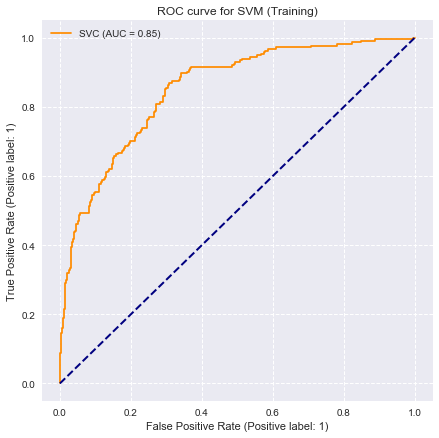

In [11]:
# Plotting the ROC curve for our training set

lw=2
plt.style.use("seaborn")
fig, ax_roc = plt.subplots(1, figsize = (7, 7))
plot_roc_curve(svm, X_train, y_train, ax = ax_roc, color = "darkorange")
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
ax_roc.set_title('ROC curve for SVM (Training)')
ax_roc.grid(linestyle='--')

plt.legend()
plt.show()

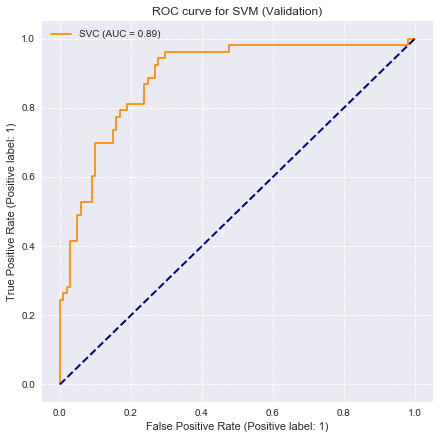

In [12]:
# Plotting the ROC curve for our Validation set

lw = 2
plt.style.use("seaborn")
fig, ax_roc = plt.subplots(1, figsize = (7, 7))
plot_roc_curve(svm, X_valdation, y_validation, ax = ax_roc, color = "darkorange")
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
ax_roc.set_title('ROC curve for SVM (Validation)')
ax_roc.grid(linestyle='--')

plt.legend()
plt.show()

#### We will now plot the SVMs used with the validation set in an attempt to derive meaningful observations. 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


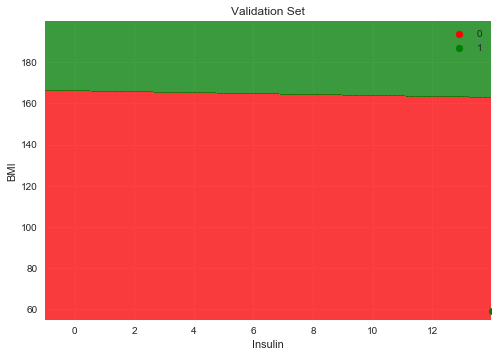

In [13]:
X_set, y_set = X_valdation, y_validation
from matplotlib.colors import ListedColormap

X1, X2 = np.meshgrid(np.arange(start = X_set.iloc[:, 0].min() - 1, stop = X_set.iloc[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set.iloc[:, 1].min() - 1, stop = X_set.iloc[:, 1].max() + 1, step = 0.01))
Xpred = np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in range(6)]).T
# Xpred now has a grid for x1 and x2 and average value (0) for x3 through x13
pred = svm.predict(Xpred).reshape(X1.shape)   # is a matrix of 0's and 1's !
plt.contourf(X1, X2, pred,
             alpha = 0.75, cmap = ListedColormap(('red', 'green')));

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set.loc[y_set == j, X_set.columns[4]], X_set.loc[y_set == j, X_set.columns[5]],
                c = ListedColormap(('red', 'green'))(i), label = j);
plt.title('Validation Set')
plt.xlabel('Insulin')
plt.ylabel('BMI')
plt.legend();
plt.show();

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


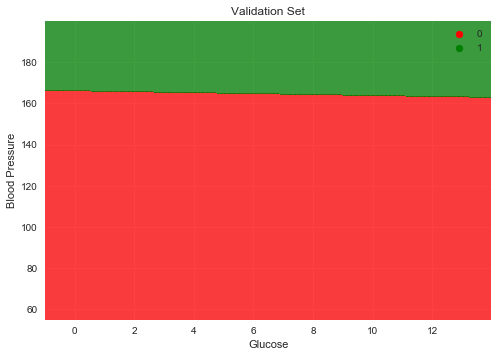

In [14]:
X_set, y_set = X_valdation, y_validation
from matplotlib.colors import ListedColormap

X1, X2 = np.meshgrid(np.arange(start = X_set.iloc[:, 0].min() - 1, stop = X_set.iloc[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set.iloc[:, 1].min() - 1, stop = X_set.iloc[:, 1].max() + 1, step = 0.01))
Xpred = np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in range(6)]).T
# Xpred now has a grid for x1 and x2 and average value (0) for x3 through x13
pred = svm.predict(Xpred).reshape(X1.shape)   # is a matrix of 0's and 1's !
plt.contourf(X1, X2, pred,
             alpha = 0.75, cmap = ListedColormap(('red', 'green')));

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set.loc[y_set == j, X_set.columns[1]], X_set.loc[y_set == j, X_set.columns[2]],
                c = ListedColormap(('red', 'green'))(i), label = j);
plt.title('Validation Set')
plt.xlabel('Glucose')
plt.ylabel('Blood Pressure')
plt.legend();
plt.show();

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


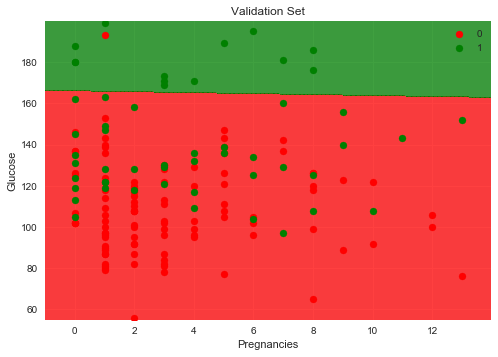

In [20]:
X_set, y_set = X_valdation, y_validation
from matplotlib.colors import ListedColormap

X1, X2 = np.meshgrid(np.arange(start = X_set.iloc[:, 0].min() - 1, stop = X_set.iloc[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set.iloc[:, 1].min() - 1, stop = X_set.iloc[:, 1].max() + 1, step = 0.01))
Xpred = np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in range(6)]).T
# Xpred now has a grid for x1 and x2 and average value (0) for x3 through x13
pred = svm.predict(Xpred).reshape(X1.shape)   # is a matrix of 0's and 1's !
plt.contourf(X1, X2, pred,
             alpha = 0.75, cmap = ListedColormap(('red', 'green')));

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set.loc[y_set == j, X_set.columns[0]], X_set.loc[y_set == j, X_set.columns[1]],
                c = ListedColormap(('red', 'green'))(i), label = j);
plt.title('Validation Set')
plt.xlabel('Pregnancies')
plt.ylabel('Glucose')
plt.legend();
plt.show();

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


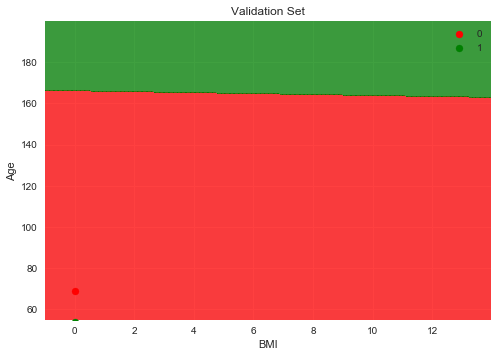

In [21]:
X_set, y_set = X_valdation, y_validation
from matplotlib.colors import ListedColormap

X1, X2 = np.meshgrid(np.arange(start = X_set.iloc[:, 0].min() - 1, stop = X_set.iloc[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set.iloc[:, 1].min() - 1, stop = X_set.iloc[:, 1].max() + 1, step = 0.01))
Xpred = np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in range(6)]).T
# Xpred now has a grid for x1 and x2 and average value (0) for x3 through x13
pred = svm.predict(Xpred).reshape(X1.shape)   # is a matrix of 0's and 1's !
plt.contourf(X1, X2, pred,
             alpha = 0.75, cmap = ListedColormap(('red', 'green')));

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set.loc[y_set == j, X_set.columns[5]], X_set.loc[y_set == j, X_set.columns[7]],
                c = ListedColormap(('red', 'green'))(i), label = j);
plt.title('Validation Set')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.legend();
plt.show();

#### Our SVM plots are mostly inconclusive.

In [19]:
import pickle

with open("optimal_svm", "wb") as op_svm:
    pickle.dump(clf, op_svm)

# Conclusion

The SVM with that acheived the most optimal results had the parameters SVC(C=10, kernel='poly').